In [1]:
# Unsupervised Learning Example in Python

# Import Libraries
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer         # Load the Breast cancer datasets from sklearn that doesnt need to download or import
from sklearn.preprocessing import StandardScaler        # To Standardize the data
from sklearn.cluster import KMeans                      # For K-means Clustering
from sklearn.decomposition import PCA                   # For Principal Component Analysis
from sklearn.cluster import DBSCAN                      # For Density -Based Spatial Clustering
from scipy.cluster.hierarchy import dendrogram, linkage # For Hierarchical Clustering

import matplotlib.pyplot as plt  
import seaborn as sns                                   # For enchanced Data Visualization


In [3]:
# Load the breast cancer datasets 

cancer_data= load_breast_cancer()          # Load the datasets from sklearn's built-in datasets
data = cancer_data.data                    # Extract feaute data
feature_names = cancer_data.feature_names  # Feature names for reference 
target = cancer_data.target                # Extract target variables


In [4]:
# Convert the dataset into a Pandas DataFrame for easier manipulation

df = pd.DataFrame(data, columns = feature_names)

In [5]:
# Display the first rows of the datasets 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Step 1: Data Standardization

In [6]:
# Standardize the data to have a mean of nearly 0 and variance of 1, which is important for PCA and K-means

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # Fit & Transform the data 

# Step 2: K-Means Clustering

In [7]:
# Initialize K-Means with  clusters
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(scaled_data) # Fit the K-Means algorithm to the data

KMeans(n_clusters=4, random_state=42)

In [8]:
# Add the cluster labels to the DataFrame 
df['KMeans_Cluster'] = kmeans.labels_

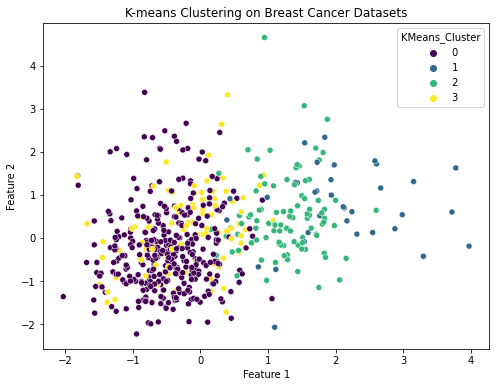

In [9]:
# Plotting the K-means Clusters
plt.figure(figsize = (8,6))
sns.scatterplot(x= scaled_data[:,0], y= scaled_data[:,1], hue = df['KMeans_Cluster'], palette = 'viridis')
plt.title('K-means Clustering on Breast Cancer Datasets')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 3: Hierarchical Clustering

In [10]:
# Perform hierarchical Clustering
linked = linkage(scaled_data, method = 'ward')

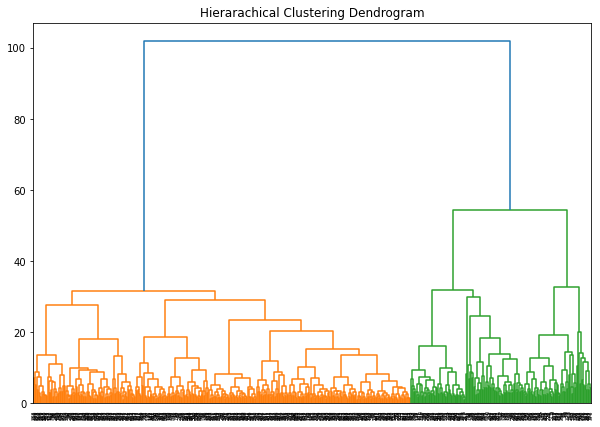

In [11]:
# Plot the dendrogram

plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top', distance_sort = 'descendig', show_leaf_counts = True)
plt.title('Hierarachical Clustering Dendrogram')
plt.show()

# Step 4: DBSCAN Clustering 

In [12]:
# Initialize DBSCAN with default parameters
dbscan = DBSCAN(eps = 0.5, min_samples = 10)
dbscan.fit(scaled_data)  # Fit DBSCAN to the scaled data

DBSCAN(min_samples=10)

In [13]:
# Add DBSCAN cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan.labels_

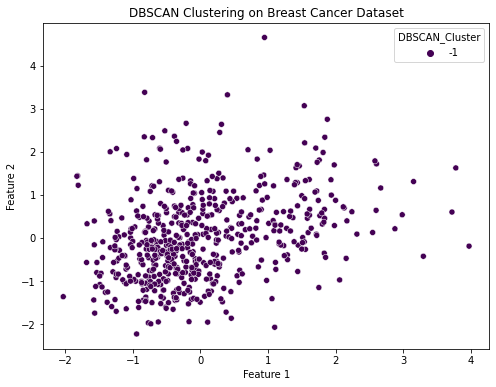

In [14]:
# Plotting the DBSCAN Clusters 
plt.figure(figsize = (8,6))
sns.scatterplot(x = scaled_data[:,0], y=scaled_data[:, 1], hue = df['DBSCAN_Cluster'], palette = 'viridis')
plt.title('DBSCAN Clustering on Breast Cancer Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 5: Principal Component Analysis(PCA)

In [15]:
# Initialize PCA to reduce to 2 dimensions for visualization purposes
pca = PCA(n_components =2 )
pca_data = pca.fit_transform(scaled_data)

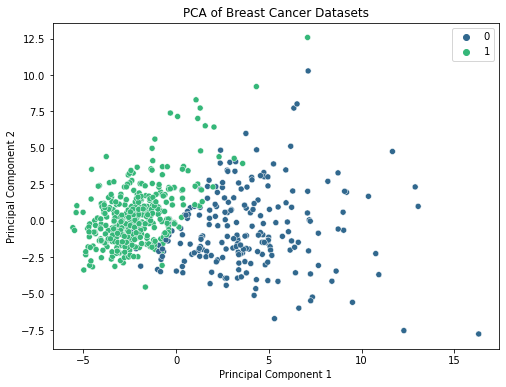

In [16]:
# Plotting the PCA results 
plt.figure(figsize = (8,6))
sns.scatterplot(x=pca_data[:,0], y = pca_data[:,1], hue = cancer_data.target, palette = 'viridis')
plt.title('PCA of Breast Cancer Datasets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()